<a href="https://colab.research.google.com/github/Nnamchisimi/Nnamchisimi/blob/main/(use)20082024quantity_ordered_code_f%C4%B1rst_work_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(USE THIS latest) **FULL CODE order quantity(good)**

In [ ]:
import pandas as pd
import math

# Load the Excel file
file_path = '/content/OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Display the first few rows of each sheet to understand their structure
print(df_sheet1.head())
print(df_sheet2.head())

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Check the reorder conditions and calculate order quantity
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']

    # Check if the product has been sold for any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate order quantity based on the formula (average month * 2 - Total stk) only for rows where reorder_decision is 'Order'
df_merged['order_quantity'] = df_merged.apply(
    lambda row: max(math.ceil(row['Average month'] * 2 - abs(row['Total stk'])), 0) if row['reorder_decision'] == 'Order' else 0,
    axis=1
)

# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        # Track if the item was sold in that month and only mark it if a sale was made
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0  # If the column is missing, set to 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Save the results to a new Excel file
output_file_path = '/content/result1.xlsx'
df_merged.to_excel(output_file_path, index=False)

# Display the first few rows of the merged DataFrame to verify the results
print(df_merged.head())

**confırmed, still same , but removes** **do not order details**

In [ ]:
import pandas as pd
import math

# Load the Excel file
file_path = '/content/OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Display the first few rows of each sheet to understand their structure
print(df_sheet1.head())
print(df_sheet2.head())

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Check the reorder conditions and calculate order quantity
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']

    # Check if the product has been sold for any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate order quantity based on the formula (average month * 2 - Total stk) and round up to the nearest whole number
df_merged['order_quantity'] = df_merged.apply(
    lambda row: math.ceil(row['Average month'] * 2 - abs(row['Total stk'])) if row['reorder_decision'] == 'Order' else 0,
    axis=1
)

# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        # Track if the item was sold in that month and only mark it if a sale was made
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0  # If the column is missing, set to 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/result2.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


       part number  track name         H0         H1         H2         H3  \
0              NaN         NaN        NaN        NaN        NaN        NaN   
1     JK68045260AA         NaN       0,00       0,00       0,00       0,00   
2          marka J         NaN        NaN        NaN        NaN        NaN   
3              NaN         NaN        NaN        NaN        NaN        NaN   
4  MA000 010 12 85  FILLER CAP       0,00       0,00       0,00       0,00   

          H4         H5         H6         H7  ...      H11      H12  \
0        NaN        NaN        NaN        NaN  ...      NaN      NaN   
1       0,00       0,00       0,00       0,00  ...     0,00     0,00   
2        NaN        NaN        NaN        NaN  ...      NaN      NaN   
3        NaN        NaN        NaN        NaN  ...      NaN      NaN   
4       0,00       0,00       0,00       0,00  ...     0,00     0,00   

  shelf space      Piece Open order.  Balance   Sales f-€  RGr     Cost-€  \
0         NaN        

**1st trial 04092024. not certaın**

In [ ]:
import pandas as pd
import math
import numpy as np  # Import numpy

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged.loc[:, month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Calculate the average monthly demand based on the past 6 months (H1 to H6)
df_merged['average_monthly_demand'] = df_merged[months].mean(axis=1)

# Fill NaN values with 0 before rounding to the next whole number
df_merged['average_monthly_demand'] = df_merged['average_monthly_demand'].fillna(0)

# Round the 'average_monthly_demand' to the next whole number
df_merged['average_monthly_demand'] = np.ceil(df_merged['average_monthly_demand'])

# Treat 'Total stk' as positive, fill NaN with 0 for calculations
df_merged['Total stk'] = df_merged['Total stk'].abs().fillna(0)
df_merged['Average month'] = df_merged['Average month'].fillna(0)

# Check reorder conditions
def should_reorder(row):
    total_stk = row['Total stk']
    average_month = row['Average month']
    sold_in_last_6_months = any(pd.notna(row[month]) and row[month] > 0 for month in months if month in row.index)

    # Only order if the total stock is less than average monthly sales and sales were made in the last 6 months
    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate order quantity only for rows where reorder_decision is 'Order'
df_merged['order_quantity'] = df_merged.apply(
    lambda row: max(math.ceil(row['Average month'] * 2 - row['Total stk']), 0) if row['reorder_decision'] == 'Order' else 0,
    axis=1
)

# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


Exception ignored in: <function ZipFile.__del__ at 0x7d1398cc8a60>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1833, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1850, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


           part number          track name         H0   H1   H2   H3    H4  \
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
36     MA000 153 18 00  PRESSURE TRANSDUCE       0,00  0.0  0.0  0.0   0.0   
53     MA000 202 09 19        GUIDE PULLEY       0,00  0.0  2.0  0.0   0.0   
68  MA000 270 33 00/80  REPAIR KIT, CONTR.       0,00  1.0  0.0  0.0   0.0   

      H5   H6         H7  ... average_monthly_demand reorder_decision  \
17  10.0  0.0       0,00  ...                    2.0            Order   
20   0.0  0.0       0,00  ...                    2.0            Order   
36   1.0  0.0       0,00  ...                    1.0            Order   
53   0.0  0.0       0,00  ...                    1.0            Order   
68   0.0  0.0       0,00  ...                    1.0            Order   

   order_quantity H6_quantity_ordered H5_quantity_ordered H4_quantity_ordered  \
17         

***using eoq, not confirmed ***

In [ ]:
import pandas as pd
import math
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged.loc[:, month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Calculate the average monthly demand based on the past 6 months (H1 to H6)
df_merged['average_monthly_demand'] = df_merged[months].mean(axis=1)

# Fill NaN values with 0 before rounding to the next whole number
df_merged['average_monthly_demand'] = df_merged['average_monthly_demand'].fillna(0)

# Round the 'average_monthly_demand' to the next whole number
df_merged['average_monthly_demand'] = np.ceil(df_merged['average_monthly_demand'])

# Treat 'Total stk' as positive, fill NaN with 0 for calculations
df_merged['Total stk'] = df_merged['Total stk'].abs().fillna(0)
df_merged['Average month'] = df_merged['Average month'].fillna(0)

# Define ordering cost (S) and holding cost (H)
ordering_cost = 50  # Example value, replace with actual cost
holding_cost = 2    # Example value, replace with actual cost

# Calculate EOQ for each item and round to the nearest whole number
def calculate_eoq(demand, ordering_cost, holding_cost):
    if demand > 0 and holding_cost > 0:
        return round(math.sqrt((2 * demand * ordering_cost) / holding_cost))
    return 0

df_merged['EOQ'] = df_merged['average_monthly_demand'].apply(lambda x: calculate_eoq(x, ordering_cost, holding_cost))

# Calculate order quantity based on EOQ
df_merged['order_quantity'] = df_merged.apply(
    lambda row: max(row['EOQ'] - row['Total stk'], 0) if row['Total stk'] < row['EOQ'] else 0,
    axis=1
)

# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where order_quantity is greater than 0
df_order_only = df_merged[df_merged['order_quantity'] > 0]

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_eoq.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
16     MA000 015 12 00       CAP WITH SEAL       0,00  0.0  0.0  0.0   1.0   
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
31     MA000 090 07 00  AIR FILTER ELEMENT       0,00  0.0  0.0  0.0   0.0   
33     MA000 090 37 51  AIR FILTER ELEMENT       3,00  2.0  0.0  1.0   2.0   

      H5   H6         H7  ... average_monthly_demand EOQ order_quantity  \
16   0.0  0.0       1,00  ...                    1.0   7            3.0   
17  10.0  0.0       0,00  ...                    2.0  10           10.0   
20   0.0  0.0       0,00  ...                    2.0  10           10.0   
31   1.0  0.0       0,00  ...                    1.0   7            5.0   
33   6.0  1.0       0,00  ...                    2.0  10            8.0   

   H6_quantity_ordered H5_quantity_ordered H4_quantity_ordered  \
16            

***on the right track || ask to fınd out if accurate|| calculating order quantity using eoq and order quantity duration ***

In [ ]:
import pandas as pd
import math
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged.loc[:, month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Add a new column for the total demand over the 6 months
df_merged['total_demand_6_months'] = df_merged[months].sum(axis=1)

# Calculate the average monthly demand based on the past 6 months (H1 to H6)
df_merged['average_monthly_demand'] = df_merged[months].mean(axis=1)

# Fill NaN values with 0 before rounding to the next whole number
df_merged['average_monthly_demand'] = df_merged['average_monthly_demand'].fillna(0)

# Round the 'average_monthly_demand' to the next whole number
df_merged['average_monthly_demand'] = np.ceil(df_merged['average_monthly_demand'])

# Treat 'Total stk' as positive, fill NaN with 0 for calculations
df_merged['Total stk'] = df_merged['Total stk'].abs().fillna(0)
df_merged['Average month'] = df_merged['Average month'].fillna(0)

# Define ordering cost (S) and holding cost (H)
ordering_cost = 50  # Example value, replace with actual cost
holding_cost = 2    # Example value, replace with actual cost

# Calculate EOQ for each item and round to the nearest whole number
def calculate_eoq(demand, ordering_cost, holding_cost):
    if demand > 0 and holding_cost > 0:
        return round(math.sqrt((2 * demand * ordering_cost) / holding_cost))
    return 0

df_merged['EOQ'] = df_merged['average_monthly_demand'].apply(lambda x: calculate_eoq(x, ordering_cost, holding_cost))

# Calculate order quantity based on EOQ
df_merged['order_quantity'] = df_merged.apply(
    lambda row: max(row['EOQ'] - row['Total stk'], 0) if row['Total stk'] < row['EOQ'] else 0,
    axis=1
)

# Calculate how long the order quantity will last in months
df_merged['order_quantity_duration_months'] = df_merged.apply(
    lambda row: row['order_quantity'] / row['average_monthly_demand'] if row['average_monthly_demand'] > 0 else 0,
    axis=1
)

# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where order_quantity is greater than 0
df_order_only = df_merged[df_merged['order_quantity'] > 0]

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_eoq1.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
16     MA000 015 12 00       CAP WITH SEAL       0,00  0.0  0.0  0.0   1.0   
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
31     MA000 090 07 00  AIR FILTER ELEMENT       0,00  0.0  0.0  0.0   0.0   
33     MA000 090 37 51  AIR FILTER ELEMENT       3,00  2.0  0.0  1.0   2.0   

      H5   H6         H7  ... EOQ order_quantity  \
16   0.0  0.0       1,00  ...   7            3.0   
17  10.0  0.0       0,00  ...  10           10.0   
20   0.0  0.0       0,00  ...  10           10.0   
31   1.0  0.0       0,00  ...   7            5.0   
33   6.0  1.0       0,00  ...  10            8.0   

   order_quantity_duration_months H6_quantity_ordered H5_quantity_ordered  \
16                            3.0                   0                   0   
17                            5.0                   0           

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Create columns to indicate if the product was sold in each month
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Define lead time in months (15 days = 0.5 months) and safety stock (set to 0)
lead_time_in_months = 0.5  # 15 days as a fraction of a month
df_merged['safety_stock'] = 0  # Safety stock is 0 for all parts

# Calculate the Reorder Point (ROP) using 'Average month' directly as demand
df_merged['lead_time_demand'] = df_merged['Average month'] * lead_time_in_months
df_merged['ROP'] = df_merged['lead_time_demand'] + df_merged['safety_stock']

# Round ROP and lead_time_demand to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['lead_time_demand'] = np.ceil(df_merged['lead_time_demand']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Calculate EOQ using the formula: EOQ = sqrt((2 * D * S) / H)
def calculate_eoq(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        # Aggregate demand over the 6-month period
        total_demand_6_months = row[months].sum()
        if total_demand_6_months > 0:
            return np.sqrt((2 * total_demand_6_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_eoq, axis=1)

# Round EOQ to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[f'{month}_quantity_ordered'] > 0 for month in months if f'{month}_quantity_ordered' in row.index)

    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period
quantity_ordered_columns = [f'{month}_quantity_ordered' for month in months]
df_merged['six_months_order'] = df_merged[quantity_ordered_columns].sum(axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_reorderpoint4.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
36     MA000 153 18 00  PRESSURE TRANSDUCE       0,00  0.0  0.0  0.0   0.0   
53     MA000 202 09 19        GUIDE PULLEY       0,00  0.0  2.0  0.0   0.0   
68  MA000 270 33 00/80  REPAIR KIT, CONTR.       0,00  1.0  0.0  0.0   0.0   

      H5   H6         H7  ... H2_quantity_ordered H1_quantity_ordered  \
17  10.0  0.0       0,00  ...                   0                   0   
20   0.0  0.0       0,00  ...                   0                   0   
36   1.0  0.0       0,00  ...                   0                   0   
53   0.0  0.0       0,00  ...                   1                   0   
68   0.0  0.0       0,00  ...                   0                   1   

   safety_stock lead_time_demand ROP Holding Cost Ordering Cost EOQ  \
17            0      

rop calculation good

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged.loc[:, month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Treat 'Total stk' as positive, fill NaN with 0 for calculations
df_merged['Total stk'] = df_merged['Total stk'].abs().fillna(0)

# Use 'Average month' as the demand, and fill NaN with 0
df_merged['Average month'] = df_merged['Average month'].fillna(0)

# Define lead time in months (15 days = 0.5 months) and safety stock (set to 0)
lead_time_in_months = 0.5  # 15 days as a fraction of a month
df_merged['safety_stock'] = 0  # Safety stock is 0 for all parts

# Calculate the Reorder Point (ROP) using 'Average month' directly as demand
df_merged['lead_time_demand'] = df_merged['Average month'] * lead_time_in_months
df_merged['ROP'] = df_merged['lead_time_demand'] + df_merged['safety_stock']

# Round ROP and lead_time_demand to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['lead_time_demand'] = np.ceil(df_merged['lead_time_demand']).astype(int)

# Check the reorder conditions and calculate order quantity
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate order quantity only for parts where reorder_decision is 'Order'
df_merged['order_quantity'] = df_merged.apply(
    lambda row: max(np.ceil(row['ROP'] - row['Total stk']).astype(int), 0) if row['reorder_decision'] == 'Order' else 0,
    axis=1
)

# Calculate how long the order quantity will last in months
df_merged['order_quantity_duration_months'] = df_merged.apply(
    lambda row: np.ceil(row['order_quantity'] / row['Average month']).astype(int) if row['Average month'] > 0 else 0,
    axis=1
)

# Filter to show only rows where reorder_decision is 'Order' and order_quantity is greater than 0
df_order_only = df_merged[(df_merged['reorder_decision'] == 'Order') & (df_merged['order_quantity'] > 0)]

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_reorderpoint.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
36     MA000 153 18 00  PRESSURE TRANSDUCE       0,00  0.0  0.0  0.0   0.0   
53     MA000 202 09 19        GUIDE PULLEY       0,00  0.0  2.0  0.0   0.0   
68  MA000 270 33 00/80  REPAIR KIT, CONTR.       0,00  1.0  0.0  0.0   0.0   

      H5   H6         H7  ... Required quantity order  \
17  10.0  0.0       0,00  ...               2.0     T   
20   0.0  0.0       0,00  ...               2.0     T   
36   1.0  0.0       0,00  ...               0.0     T   
53   0.0  0.0       0,00  ...               1.0     T   
68   0.0  0.0       0,00  ...               1.0     T   

                 explanation Purchase order safety_stock lead_time_demand ROP  \
17        CYLINDER HEAD BOLT            0.0            0                1   1   
20        CYLINDER HEAD BO

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months (15 days = 0.5 months) and safety stock (set to 0)
lead_time_in_months = 0.5  # 15 days as a fraction of a month
df_merged['safety_stock'] = 0  # Safety stock is 0 for all parts

# Calculate the Reorder Point (ROP) using 'Average month' directly as demand
df_merged['lead_time_demand'] = df_merged['Average month'] * lead_time_in_months
df_merged['ROP'] = df_merged['lead_time_demand'] + df_merged['safety_stock']

# Round ROP and lead_time_demand to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['lead_time_demand'] = np.ceil(df_merged['lead_time_demand']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Calculate EOQ using the formula: EOQ = sqrt((2 * D * S) / H)
def calculate_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_eoq, axis=1)

# Round EOQ to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_reorderpoint3.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
36     MA000 153 18 00  PRESSURE TRANSDUCE       0,00  0.0  0.0  0.0   0.0   
53     MA000 202 09 19        GUIDE PULLEY       0,00  0.0  2.0  0.0   0.0   
68  MA000 270 33 00/80  REPAIR KIT, CONTR.       0,00  1.0  0.0  0.0   0.0   

      H5   H6         H7  ... order               explanation Purchase order  \
17  10.0  0.0       0,00  ...     T        CYLINDER HEAD BOLT            0.0   
20   0.0  0.0       0,00  ...     T        CYLINDER HEAD BOLT            0.0   
36   1.0  0.0       0,00  ...     T       PRESSURE TRANSDUCER            0.0   
53   0.0  0.0       0,00  ...     T              GUIDE PULLEY            0.0   
68   0.0  0.0       0,00  ...     T  RS CTRR. UNIT, ELEC.HYD.            0.0   

   safety_stock lead_time_demand ROP Holding Cost 

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months (15 days = 0.5 months) and safety stock (set to 0)
lead_time_in_months = 0.5  # 15 days as a fraction of a month
df_merged['safety_stock'] = 0  # Safety stock is 0 for all parts

# Calculate the Reorder Point (ROP) using 'Average month' directly as demand
df_merged['lead_time_demand'] = df_merged['Average month'] * lead_time_in_months
df_merged['ROP'] = df_merged['lead_time_demand'] + df_merged['safety_stock']

# Round ROP and lead_time_demand to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['lead_time_demand'] = np.ceil(df_merged['lead_time_demand']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Calculate EOQ using the provided formula: EOQ = sqrt((2 * D * S) / H)
def calculate_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

# Apply the EOQ calculation to the DataFrame
df_merged['EOQ'] = df_merged.apply(calculate_eoq, axis=1)

# Round EOQ to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < average_month and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_reorderpoint4.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
36     MA000 153 18 00  PRESSURE TRANSDUCE       0,00  0.0  0.0  0.0   0.0   
53     MA000 202 09 19        GUIDE PULLEY       0,00  0.0  2.0  0.0   0.0   
68  MA000 270 33 00/80  REPAIR KIT, CONTR.       0,00  1.0  0.0  0.0   0.0   

      H5   H6         H7  ... Ordering Cost EOQ reorder_decision  \
17  10.0  0.0       0,00  ...        9.9750   3            Order   
20   0.0  0.0       0,00  ...        9.7875   3            Order   
36   1.0  0.0       0,00  ...       64.4125   1            Order   
53   0.0  0.0       0,00  ...       31.4250   2            Order   
68   0.0  0.0       0,00  ...     1011.2875   2            Order   

   H6_quantity_ordered H5_quantity_ordered H4_quantity_ordered  \
17                   0                   1              

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'OBS REPORT.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months (15 days = 0.5 months) and safety stock (set to 0)
lead_time_in_months = 0.5  # 15 days as a fraction of a month
df_merged['safety_stock'] = 0  # Safety stock is 0 for all parts

# Calculate the Reorder Point (ROP) using 'Average month' directly as demand
df_merged['lead_time_demand'] = df_merged['Average month'] * lead_time_in_months
df_merged['ROP'] = df_merged['lead_time_demand'] + df_merged['safety_stock']

# Round ROP and lead_time_demand to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['lead_time_demand'] = np.ceil(df_merged['lead_time_demand']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# 1. Regular EOQ Calculation (using 'Average month' as demand)
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# 2. EOQ for 2 months (using the sum of 'H2' and 'H1' as demand)
def calculate_eoq_1_month(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        total_demand_1_months = row['H1']
        if total_demand_1_months > 0:
            return np.sqrt((2 * total_demand_1_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ_1_month'] = df_merged.apply(calculate_eoq_1_month, axis=1)

# 2. EOQ for 2 months (using the sum of 'H2' and 'H1' as demand)
def calculate_eoq_2_months(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        total_demand_2_months = row['H2'] + row['H1']
        if total_demand_2_months > 0:
            return np.sqrt((2 * total_demand_2_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ_2_months'] = df_merged.apply(calculate_eoq_2_months, axis=1)

# 3. EOQ for 3 months (using the sum of 'H3', 'H2', 'H1' as demand)
def calculate_eoq_3_months(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        total_demand_3_months = row['H3'] + row['H2'] + row['H1']
        if total_demand_3_months > 0:
            return np.sqrt((2 * total_demand_3_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ_3_months'] = df_merged.apply(calculate_eoq_3_months, axis=1)

# 4. EOQ for 4 months (using the sum of 'H4', 'H3', 'H2', 'H1' as demand)
def calculate_eoq_4_months(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        total_demand_4_months = row['H4'] + row['H3'] + row['H2'] + row['H1']
        if total_demand_4_months > 0:
            return np.sqrt((2 * total_demand_4_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ_4_months'] = df_merged.apply(calculate_eoq_4_months, axis=1)

# 5. EOQ for 5 months (using the sum of 'H5', 'H4', 'H3', 'H2', 'H1' as demand)
def calculate_eoq_5_months(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        total_demand_5_months = row['H5'] + row['H4'] + row['H3'] + row['H2'] + row['H1']
        if total_demand_5_months > 0:
            return np.sqrt((2 * total_demand_5_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ_5_months'] = df_merged.apply(calculate_eoq_5_months, axis=1)

# 6. EOQ for 6 months (using the sum of 'H6', 'H5', 'H4', 'H3', 'H2', 'H1' as demand)
def calculate_eoq_6_months(row):
    if row['Holding Cost'] > 0 and row['Ordering Cost'] > 0:
        total_demand_6_months = row['H6'] + row['H5'] + row['H4'] + row['H3'] + row['H2'] + row['H1']
        if total_demand_6_months > 0:
            return np.sqrt((2 * total_demand_6_months * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ_6_months'] = df_merged.apply(calculate_eoq_6_months, axis=1)

# Round all EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)
df_merged['EOQ_1_month'] = np.ceil(df_merged['EOQ_1_month']).astype(int)
df_merged['EOQ_2_months'] = np.ceil(df_merged['EOQ_2_months']).astype(int)
df_merged['EOQ_3_months'] = np.ceil(df_merged['EOQ_3_months']).astype(int)
df_merged['EOQ_4_months'] = np.ceil(df_merged['EOQ_4_months']).astype(int)
df_merged['EOQ_5_months'] = np.ceil(df_merged['EOQ_5_months']).astype(int)
df_merged['EOQ_6_months'] = np.ceil(df_merged['EOQ_6_months']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    average_month = row['Average month']
    ROP= row['ROP']


    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < ROP and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period
# Count if the product was sold in each month (January to June)
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
            lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/resultnew_reorderpoint_eoq_all.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name         H0   H1   H2   H3    H4  \
17  MA000 016 00 00/64  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0   0.0   
20     MA000 016 05 69  CYLINDER HEAD BOLT       0,00  0.0  0.0  0.0  10.0   
36     MA000 153 18 00  PRESSURE TRANSDUCE       0,00  0.0  0.0  0.0   0.0   
53     MA000 202 09 19        GUIDE PULLEY       0,00  0.0  2.0  0.0   0.0   
68  MA000 270 33 00/80  REPAIR KIT, CONTR.       0,00  1.0  0.0  0.0   0.0   

      H5   H6         H7  ... EOQ_5_months EOQ_6_months reorder_decision  \
17  10.0  0.0       0,00  ...           10           10            Order   
20   0.0  0.0       0,00  ...           10           10            Order   
36   1.0  0.0       0,00  ...            4            4            Order   
53   0.0  0.0       0,00  ...            5            5            Order   
68   0.0  0.0       0,00  ...            4            4            Order   

   H6_quantity_ordered H5_quantity_ordered H4_quantity_ordered  \
17      

**code workıng  for ROP 20/09/2024 **

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate Safety Stock and ROP
def calculate_rop_safety_stock(file_path, lead_time_days=15, service_level=0.90):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Lead time in months (15 days is half a month)
    lead_time_months = lead_time_days / 30

    # Z-score based on service level
    z_score_dict = {
        0.90: 1.28,
        0.95: 1.65,
        0.98: 2.05,
        0.99: 2.33
    }

    # Get the Z-score for the desired service level (90% in this case)
    z_score = z_score_dict.get(service_level, 1.28)

    # Create empty lists to store calculated values
    rop_list = []
    safety_stock_list = []

    # Loop through each row (part) in the DataFrame
    for index, row in df.iterrows():
        # Get demand data from columns H1 to H6 (January to June)
        demand_data = row[['H1', 'H2', 'H3', 'H4', 'H5', 'H6']]

        # Calculate the average monthly demand
        avg_demand = np.mean(demand_data)

        # Calculate the standard deviation of demand
        demand_std_dev = np.std(demand_data)

        # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
        safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_months)

        # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
        rop = (avg_demand * lead_time_months) + safety_stock

        # Append the calculated values to the lists
        safety_stock_list.append(safety_stock)
        rop_list.append(rop)

    # Add the calculated values to the DataFrame
    df['Safety Stock'] = safety_stock_list
    df['ROP'] = rop_list

    # Save the result back to a new Excel file
    output_file_path = '/content/rop_safety_stock_output.xlsx'
    df.to_excel(output_file_path, index=False)

    print(f"ROP and Safety Stock calculated and saved to {output_file_path}")

# Usage example
file_path = '/content/resultnew_reorderpoint_eoq_all (1).xlsx'  # Your actual Excel file path
calculate_rop_safety_stock(file_path, lead_time_days=15, service_level=0.90)


ROP and Safety Stock calculated and saved to /content/rop_safety_stock_output.xlsx


USE THIS ROP WORKS, EOQ IN TESTING BUT NOT NEEDED



In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/OBS 1.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged[month] = pd.to_numeric(df_merged[month].str.replace(',', '.'), errors='coerce')

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 15 days = 0.5 months)
lead_time_in_months = 0.5

# Z-score based on the service level
service_level = 0.90
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 1.28)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H1', 'H2', 'H3', 'H4', 'H5', 'H6']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP for each row
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values in 'ROP' and 'Safety Stock' columns with 0 before rounding
df_merged['ROP'] = df_merged['ROP'].fillna(0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].fillna(0)

# Round ROP and Safety Stock to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk < rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/230924resultnew_reorderpoint_eoq_all_with_rop_safety_stock.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


AttributeError: Can only use .str accessor with string values!

**same code as the one directly above, just works with dta that have . instead of ,**

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/OBS 1.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        # Convert the column to string first, then replace commas, and finally to numeric
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 15 days = 0.5 months)
lead_time_in_months = 0.5

# Z-score based on the service level
service_level = 0.90
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 1.28)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H1', 'H2', 'H3', 'H4', 'H5', 'H6']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP for each row
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values in 'ROP' and 'Safety Stock' columns with 0 before rounding
df_merged['ROP'] = df_merged['ROP'].fillna(0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].fillna(0)

# Round ROP and Safety Stock to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period and count sales in each month
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
            lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order']

# Save the filtered results to a new Excel file
output_file_path = '/content/230924resultnew_reorderpoint_eoq_all_with_rop_safety_stock.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name   H0   H1   H2   H3   H4    H5  \
18  MA000 016 00 00/64  CYLINDER HEAD BOLT  0.0  0.0  0.0  0.0  0.0   0.0   
21     MA000 016 05 69  CYLINDER HEAD BOLT  0.0  0.0  0.0  0.0  0.0  10.0   
34     MA000 090 37 51      FILTER ELEMENT  2.0  3.0  2.0  0.0  1.0   2.0   
37     MA000 153 18 00  PRESSURE TRANSDUCE  0.0  0.0  0.0  0.0  0.0   0.0   
53     MA000 200 97 23         VISCOUS FAN  0.0  0.0  0.0  1.0  0.0   0.0   

      H6   H7  ...  Ordering Cost EOQ reorder_decision H6_quantity_ordered  \
18  10.0  0.0  ...         9.9750   3            Order                   1   
21   0.0  0.0  ...         9.7875   3            Order                   0   
34   6.0  1.0  ...       126.3000   5            Order                   1   
37   1.0  0.0  ...        64.4125   1            Order                   1   
53   0.0  0.0  ...       156.2500   1            Order                   0   

   H5_quantity_ordered H4_quantity_ordered  H3_quantity_ordered  \
1

**UPDATED , USE THİS , THİS FİLTERS THE NECESSARY COLUMNS THAT ARE NEEDED**

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/OBS 2.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (January to June)
#Define the months we are interested in (September  to March)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        # Convert the column to string first, then replace commas, and finally to numeric
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Add a new column for "Calculated six months average demand" and round up using ceil
df_merged['Calculated six months average demand'] = np.ceil(df_merged[months].mean(axis=1))

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 15 days = 0.5 months)
lead_time_in_months = 0.5

# Z-score based on the service level
service_level = 0.90
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 1.28)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP for each row
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values in 'ROP' and 'Safety Stock' columns with 0 before rounding
df_merged['ROP'] = df_merged['ROP'].fillna(0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].fillna(0)

# Round ROP and Safety Stock to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period and count sales in each month
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
            lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Select the columns to display
columns_to_display = [
    'part number', 'track name', 'Total stk', 'Average month', 'Avg cost', 'Safety Stock', 'ROP',
    'Holding Cost', 'Ordering Cost', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1',
    'Calculated six months average demand', 'six_months_order', 'Sipariş emrindeki(purchase order)', 'reorder_decision'
]

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order'][columns_to_display]

# Save the filtered results to a new Excel file
output_file_path = '/content/230924resultnew_reorderpoint_eoq_all_with_rop_safety_stock.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


        part number          track name  Total stk  Average month  Avg cost  \
16  MA000 016 05 69  CYLINDER HEAD BOLT        0.0           0.56      7.83   
29  MA000 090 37 51      FILTER ELEMENT        0.0           1.99    101.04   
33  MA000 153 20 00  PRESSURE TRANSDUCE        1.0           1.96     53.72   
48  MA000 200 97 23         VISCOUS FAN        1.0           0.09    125.00   
49  MA000 202 09 19        GUIDE PULLEY        0.0           0.19     25.14   

    Safety Stock  ROP  Holding Cost  Ordering Cost    H6   H5   H4   H3   H2  \
16             4    5        1.9575         9.7875  10.0  0.0  0.0  0.0  0.0   
29             1    2       25.2600       126.3000   2.0  1.0  0.0  2.0  3.0   
33             2    3       13.4300        67.1500   0.0  0.0  0.0  0.0  0.0   
48             1    1       31.2500       156.2500   0.0  0.0  1.0  0.0  0.0   
49             1    1        6.2850        31.4250   0.0  0.0  2.0  0.0  0.0   

     H1  Calculated six months average deman

**USE THIS !!! ADJUSTED CALC 6 MNTHS AVG DEMAND 08/10/24 and 15/11/24**

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/obs 7-1.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (July to December)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        # Convert the column to string first, then replace commas, and finally to numeric
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Add a new column for "Calculated six months average demand"
df_merged['Calculated six months average demand'] = df_merged[months].mean(axis=1)

# Apply the rounding conditions: if <= 0.25, round to 0; otherwise, use np.ceil
df_merged['Calculated six months average demand'] = df_merged['Calculated six months average demand'].apply(
    lambda x: 0 if x <= 0.25 else np.ceil(x)
)

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 15 days = 0.5 months)
lead_time_in_months = 2

# Z-score based on the service level
service_level = 0.98
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 2.05)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP for each row
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values in 'ROP' and 'Safety Stock' columns with 0 before rounding
df_merged['ROP'] = df_merged['ROP'].fillna(0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].fillna(0)

# Round ROP and Safety Stock to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period and count sales in each month
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
            lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Select the columns to display
columns_to_display = [
    'part number', 'track name', 'Total stk', 'Average month', 'Avg cost', 'Safety Stock', 'ROP',
    'Holding Cost', 'Ordering Cost', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1',
    'Calculated six months average demand','EOQ', 'six_months_order', 'Sipariş emrindeki(purchase order)', 'reorder_decision'
]

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order'][columns_to_display]

# Save the filtered results to a new Excel file
output_file_path = '/content/070125resultnew_reorderpoint_eoq_all_with_rop_safety_stock.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name  Total stk  Average month  \
8   MA000 010 15 85/64          FILLER CAP        2.0           0.14   
10     MA000 015 12 00       CAP WITH SEAL        0.0           0.75   
17     MA000 016 14 00  CYLINDER HEAD BOLT        0.0           1.00   
19     MA000 053 07 00  TS VALVE STEM SEAL        4.0           0.58   
25     MA000 078 05 80              O-RING       28.0          12.20   

    Avg cost  Safety Stock  ROP  Holding Cost  Ordering Cost   H6   H5   H4  \
8       4.35             2    2        1.0875         5.4375  0.0  0.0  0.0   
10      7.49             3    4        1.8725         9.3625  0.0  0.0  0.0   
17     10.18            11   15        2.5450        12.7250  0.0  0.0  0.0   
19     13.62             5    6        3.4050        17.0250  0.0  0.0  0.0   
25      2.44            19   37        0.6100         3.0500  0.0  8.0  6.0   

     H3    H2    H1  Calculated six months average demand  EOQ  \
8   0.0   0.0   1.0       

**ORDER QUANTITY ADDED 13_01_2025**

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/obs 7-1.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (July to December)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        # Convert the column to string first, then replace commas, and finally to numeric
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Add a new column for "Calculated six months average demand"
df_merged['Calculated six months average demand'] = df_merged[months].mean(axis=1)

# Apply the rounding conditions: if <= 0.25, round to 0; otherwise, use np.ceil
df_merged['Calculated six months average demand'] = df_merged['Calculated six months average demand'].apply(
    lambda x: 0 if x <= 0.25 else np.ceil(x)
)

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 2 months)
lead_time_in_months = 2

# Z-score based on the service level
service_level = 0.98
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 2.05)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP for each row
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values in 'ROP' and 'Safety Stock' columns with 0 before rounding
df_merged['ROP'] = df_merged['ROP'].fillna(0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].fillna(0)

# Round ROP and Safety Stock to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Define the ORDERQUANTITY column based on the given conditions
def calculate_order_quantity(row):
    if row['ROP'] < row['Total stk']:
        # If ROP < Total stk, calculate as six-months average demand * 3
        return row['Calculated six months average demand'] * 3
    else:
        # Otherwise, calculate as ROP + Safety Stock
        return row['ROP'] + row['Safety Stock']

# Apply the calculation to the DataFrame
df_merged['ORDERQUANTITY'] = df_merged.apply(calculate_order_quantity, axis=1)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Select the columns to display
columns_to_display = [
    'part number', 'track name', 'Total stk', 'Average month', 'Avg cost', 'Safety Stock', 'ROP',
    'Holding Cost', 'Ordering Cost', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1',
    'Calculated six months average demand', 'EOQ', 'ORDERQUANTITY', 'Sipariş emrindeki(purchase order)', 'reorder_decision'
]

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order'][columns_to_display]

# Save the filtered results to a new Excel file
output_file_path = '/content/070125resultnew_reorderpoint_eoq_all_with_rop_safety_stock_orderquantity.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


           part number          track name  Total stk  Average month  \
8   MA000 010 15 85/64          FILLER CAP        2.0           0.14   
10     MA000 015 12 00       CAP WITH SEAL        0.0           0.75   
17     MA000 016 14 00  CYLINDER HEAD BOLT        0.0           1.00   
19     MA000 053 07 00  TS VALVE STEM SEAL        4.0           0.58   
25     MA000 078 05 80              O-RING       28.0          12.20   

    Avg cost  Safety Stock  ROP  Holding Cost  Ordering Cost   H6   H5   H4  \
8       4.35             2    2        1.0875         5.4375  0.0  0.0  0.0   
10      7.49             3    4        1.8725         9.3625  0.0  0.0  0.0   
17     10.18            11   15        2.5450        12.7250  0.0  0.0  0.0   
19     13.62             5    6        3.4050        17.0250  0.0  0.0  0.0   
25      2.44            19   37        0.6100         3.0500  0.0  8.0  6.0   

     H3    H2    H1  Calculated six months average demand  EOQ  ORDERQUANTITY  \
8   0.0   0

**FOR DO NOT ORDER!!!**

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/OBS NEW.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (April to October)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        # Convert the column to string first, then replace commas, and finally to numeric
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Add a new column for "Calculated six months average demand"
df_merged['Calculated six months average demand'] = df_merged[months].mean(axis=1)

# Apply the rounding conditions: if <= 0.25, round to 0; otherwise, use np.ceil
df_merged['Calculated six months average demand'] = df_merged['Calculated six months average demand'].apply(
    lambda x: 0 if x <= 0.25 else np.ceil(x)
)

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 15 days = 0.5 months)
lead_time_in_months = 0.5

# Z-score based on the service level
service_level = 0.90
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 1.28)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP for each row
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Replace NaN or inf in ROP and Safety Stock with 0 before rounding and converting
df_merged['ROP'] = df_merged['ROP'].replace([np.nan, np.inf, -np.inf], 0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].replace([np.nan, np.inf, -np.inf], 0)

# Round Safety Stock and ROP to whole numbers
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period and count sales in each month
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
            lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Select the columns to display
columns_to_display = [
    'part number', 'track name', 'Total stk', 'Average month', 'Avg cost', 'Safety Stock', 'ROP',
    'Holding Cost', 'Ordering Cost', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1',
    'Calculated six months average demand', 'six_months_order', 'Sipariş emrindeki(purchase order)', 'reorder_decision'
]

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Do Not Order'][columns_to_display]

# Save the filtered results to a new Excel file
output_file_path = '/content/dno151124resultnew_reorderpoint_eoq_all_with_rop_safety_stock.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the filtered DataFrame to verify the results
print(df_order_only.head())


       part number  track name  Total stk  Average month  Avg cost  \
0              NaN         NaN        0.0            0.0       0.0   
1              NaN         NaN        0.0            0.0       0.0   
2              NaN         NaN        0.0            0.0       0.0   
3              NaN         NaN        0.0            0.0       0.0   
4  MA000 010 12 85  FILLER CAP        0.0            0.0       0.0   

   Safety Stock  ROP  Holding Cost  Ordering Cost   H6   H5   H4   H3   H2  \
0             0    0           0.0            0.0  NaN  NaN  NaN  NaN  NaN   
1             0    0           0.0            0.0  NaN  NaN  NaN  NaN  NaN   
2             0    0           0.0            0.0  NaN  NaN  NaN  NaN  NaN   
3             0    0           0.0            0.0  NaN  NaN  NaN  NaN  NaN   
4             0    0           0.0            0.0  0.0  0.0  0.0  0.0  0.0   

    H1  Calculated six months average demand  six_months_order  \
0  NaN                                   NaN

**trial  to predict (Not certain, under testing)**

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/OBS NEW.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (April to October)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Add a new column for "Calculated six months average demand"
df_merged['Calculated six months average demand'] = df_merged[months].mean(axis=1)

# Apply rounding conditions: if <= 0.25, round to 0; otherwise, use np.ceil
df_merged['Calculated six months average demand'] = df_merged['Calculated six months average demand'].apply(
    lambda x: 0 if x <= 0.25 else np.ceil(x)
)

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Lead time in months and safety stock parameters
lead_time_in_months = 0.5
service_level = 0.90  # 90% Service Level
z_score_dict = {0.90: 1.28, 0.95: 1.65, 0.98: 2.05, 0.99: 2.33}
z_score = z_score_dict.get(service_level, 1.28)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)
    rop = (avg_demand * lead_time_in_months) + safety_stock

    return safety_stock, rop

# Apply the function to calculate Safety Stock and ROP
df_merged[['Safety Stock', 'ROP']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values and round results
df_merged['ROP'] = np.ceil(df_merged['ROP'].fillna(0)).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock'].fillna(0)).astype(int)

# Calculate Holding Cost and Ordering Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Calculate EOQ (Economic Order Quantity)
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0
df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Reorder decision logic
def should_reorder(row):
    total_stk = abs(row['Total stk'])
    rop = row['ROP']
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate stock movement trends
def classify_stock_trend(row):
    if row['six_months_order'] == 0:
        return 'Dead Stock'
    elif row['six_months_order'] <= 2:
        return 'Slow Moving'
    elif row['six_months_order'] > 2:
        return 'Fast Moving'
    return 'Unknown'

for month in months:
    df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
        lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)

df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)
df_merged['Stock Trend'] = df_merged.apply(classify_stock_trend, axis=1)

# Turnover Ratio and Classification
df_merged['Turnover Ratio'] = df_merged[months].sum(axis=1) / (df_merged['Total stk'] + 1e-5)

def classify_turnover(turnover):
    if turnover == 0:
        return 'No Movement'
    elif turnover < 1:
        return 'Low Turnover'
    elif 1 <= turnover <= 3:
        return 'Moderate Turnover'
    else:
        return 'High Turnover'

df_merged['Turnover Category'] = df_merged['Turnover Ratio'].apply(classify_turnover)

# Suggest Actions Based on Trends
def suggest_stock_action(row):
    if row['Stock Trend'] == 'Dead Stock':
        return 'Consider liquidation or discounting.'
    elif row['Stock Trend'] == 'Slow Moving':
        return 'Reduce reorder quantity and monitor closely.'
    elif row['Turnover Category'] == 'Low Turnover':
        return 'Review demand forecasts and avoid overstocking.'
    else:
        return 'Maintain optimal stock levels.'

df_merged['Stock Action'] = df_merged.apply(suggest_stock_action, axis=1)

# Final columns to display
columns_to_display = [
    'part number', 'track name', 'Total stk', 'Average month', 'Avg cost', 'Safety Stock', 'ROP',
    'Holding Cost', 'Ordering Cost', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1',
    'Calculated six months average demand', 'six_months_order', 'Stock Trend',
    'Turnover Ratio', 'Turnover Category', 'Stock Action', 'reorder_decision'
]

# Filter for reorder decisions
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order'][columns_to_display]

# Save results to Excel
output_file_path = '/content/n151124resultnew_trend_analysis.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    df_order_only.to_excel(writer, sheet_name='Reorder Decisions', index=False)
    df_merged[columns_to_display].to_excel(writer, sheet_name='Full Analysis', index=False)

print("Stock analysis and recommendations completed. Results saved to Excel file.")


Stock analysis and recommendations completed. Results saved to Excel file.


***same wıth the one i always use, just displays the demand standard deviation  and square root of lead time in months  ***

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/OBS NEW.xlsx'
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Merge the two DataFrames on 'part number' for easier comparison
df_merged = pd.merge(df_sheet1, df_sheet2, on='part number', suffixes=('_sheet1', '_sheet2'))

# Define the months we are interested in (April to October)
months = ['H6', 'H5', 'H4', 'H3', 'H2', 'H1']

# Convert month columns to numeric, coerce errors to NaN
for month in months:
    if month in df_merged.columns:
        # Convert the column to string first, then replace commas, and finally to numeric
        df_merged[month] = pd.to_numeric(df_merged[month].astype(str).str.replace(',', '.'), errors='coerce')

# Add a new column for "Calculated six months average demand"
df_merged['Calculated six months average demand'] = df_merged[months].mean(axis=1)

# Apply the rounding conditions: if <= 0.25, round to 0; otherwise, use np.ceil
df_merged['Calculated six months average demand'] = df_merged['Calculated six months average demand'].apply(
    lambda x: 0 if x <= 0.25 else np.ceil(x)
)

# Convert relevant columns to numeric
df_merged['Total stk'] = pd.to_numeric(df_merged['Total stk'], errors='coerce').fillna(0)
df_merged['Average month'] = pd.to_numeric(df_merged['Average month'], errors='coerce').fillna(0)
df_merged['Avg cost'] = pd.to_numeric(df_merged['Avg cost'], errors='coerce').fillna(0)

# Define lead time in months and safety stock (lead time = 15 days = 0.5 months)
lead_time_in_months = 0.5

# Z-score based on the service level
service_level = 0.90
z_score_dict = {
    0.90: 1.28,
    0.95: 1.65,
    0.98: 2.05,
    0.99: 2.33
}
z_score = z_score_dict.get(service_level, 1.28)

# Function to calculate Safety Stock and ROP
def calculate_safety_stock_rop(row, z_score, lead_time_in_months):
    demand_data = row[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']]
    avg_demand = np.mean(demand_data)
    demand_std_dev = np.std(demand_data)

    # Safety Stock = Z-score * Std Dev of Demand * sqrt(Lead Time in months)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time_in_months)

    # Reorder Point (ROP) = (Average Demand During Lead Time) + Safety Stock
    rop = (avg_demand * lead_time_in_months) + safety_stock

    # Return additional columns for output
    return safety_stock, rop, demand_std_dev, np.sqrt(lead_time_in_months)

# Apply the function to calculate Safety Stock, ROP, demand_std_dev, and sqrt(lead_time_in_months)
df_merged[['Safety Stock', 'ROP', 'demand_std_dev', 'sqrt_lead_time']] = df_merged.apply(
    lambda row: calculate_safety_stock_rop(row, z_score, lead_time_in_months),
    axis=1,
    result_type='expand'
)

# Fill NaN values in 'ROP' and 'Safety Stock' columns with 0 before rounding
df_merged['ROP'] = df_merged['ROP'].fillna(0)
df_merged['Safety Stock'] = df_merged['Safety Stock'].fillna(0)

# Round ROP and Safety Stock to the next whole number
df_merged['ROP'] = np.ceil(df_merged['ROP']).astype(int)
df_merged['Safety Stock'] = np.ceil(df_merged['Safety Stock']).astype(int)

# Calculate Holding Cost (H) as 25% of Average Cost
df_merged['Holding Cost'] = df_merged['Avg cost'] * 0.25

# Calculate Ordering Cost (S) as 1.25 times Average Cost
df_merged['Ordering Cost'] = df_merged['Avg cost'] * 1.25

# Regular EOQ Calculation
def calculate_regular_eoq(row):
    if row['Holding Cost'] > 0:  # Prevent division by zero
        return np.sqrt((2 * row['Average month'] * row['Ordering Cost']) / row['Holding Cost'])
    return 0

df_merged['EOQ'] = df_merged.apply(calculate_regular_eoq, axis=1)

# Round EOQ values to the next whole number
df_merged['EOQ'] = np.ceil(df_merged['EOQ']).astype(int)

# Check the reorder conditions
def should_reorder(row):
    total_stk = abs(row['Total stk'])  # Treat Total stk as positive
    rop = row['ROP']

    # Check if the product has been sold in any of the last 6 months
    sold_in_last_6_months = any(row[month] > 0 for month in months if month in row.index and not pd.isna(row[month]))

    if total_stk <= rop and sold_in_last_6_months:
        return 'Order'
    return 'Do Not Order'

# Apply the should_reorder function to create the reorder_decision column
df_merged['reorder_decision'] = df_merged.apply(should_reorder, axis=1)

# Calculate total quantity ordered over the 6-month period and count sales in each month
for month in months:
    if month in df_merged.columns:
        df_merged[f'{month}_quantity_ordered'] = df_merged.apply(
            lambda row: 1 if pd.notna(row[month]) and row[month] > 0 else 0, axis=1)
    else:
        df_merged[f'{month}_quantity_ordered'] = 0

# Calculate total months ordered by summing up the individual month columns
df_merged['six_months_order'] = df_merged[[f'{month}_quantity_ordered' for month in months]].sum(axis=1)

# Select the columns to display
columns_to_display = [
    'part number', 'track name', 'Total stk', 'Average month', 'Avg cost',
    'Safety Stock', 'ROP', 'demand_std_dev', 'sqrt_lead_time',
    'Holding Cost', 'Ordering Cost', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1',
    'Calculated six months average demand', 'six_months_order',
    'Sipariş emrindeki(purchase order)', 'reorder_decision'
]

# Filter to show only rows where reorder_decision is 'Order'
df_order_only = df_merged[df_merged['reorder_decision'] == 'Order'][columns_to_display]

# Save the filtered results to a new Excel file
output_file_path = '/content/020125resultnew_reorderpoint_eoq_all_with_rop_safety_stock.xlsx'
df_order_only.to_excel(output_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify the results
print(df_order_only.head())


        part number          track name  Total stk  Average month  Avg cost  \
12  MA000 015 12 00       CAP WITH SEAL        1.0           0.45      7.49   
33  MA000 153 20 00  PRESSURE TRANSDUCE        3.0           1.29     54.07   
38  MA000 159 05 00          SPARK PLUG        8.0           6.85     13.20   
48  MA000 200 97 23         VISCOUS FAN        1.0           0.08    125.00   
51  MA000 202 18 19        GUIDE PULLEY        0.0           0.15     35.57   

    Safety Stock  ROP  demand_std_dev  sqrt_lead_time  Holding Cost  ...   H6  \
12             1    1        0.745356        0.707107        1.8725  ...  0.0   
33             2    3        1.863390        0.707107       13.5175  ...  0.0   
38             5    8        4.472136        0.707107        3.3000  ...  8.0   
48             1    1        0.372678        0.707107       31.2500  ...  0.0   
51             1    1        0.372678        0.707107        8.8925  ...  0.0   

     H5   H4   H3   H2    H1  Calculat

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data from the Excel file
data = pd.read_csv('/content/obs7-1-FILTER.csv')

# Show the first few rows of the data to inspect it
print(data.head())


          part number      track name  Total stk  Average month  Avg cost  \
0     MA000 420 02 05  DISK BRAKE PAD          4           4.74     40.66   
1     MA000 420 03 05  DISK BRAKE PAD          1           1.51     42.77   
2  MA000 420 03 05/64  DISK BRAKE PAD          0           1.64     43.35   
3     MA000 420 06 04  DISK BRAKE PAD          4           6.99    125.42   
4     MA000 420 10 05  DISK BRAKE PAD          2           2.95     53.98   

   Safety Stock  ROP  Holding Cost  Ordering Cost  H6  H5  H4  H3  H2  H1  \
0             2    4       10.1650        50.8250   1   3   2   7   4   6   
1             2    3       10.6925        53.4625   2   1   0   5   2   0   
2             2    3       10.8375        54.1875   0   3   0   1   0   4   
3             4    7       31.3550       156.7750   2   7   3  13   3  10   
4             3    4       13.4950        67.4750   0   0   0   4   2   6   

   Calculated six months average demand  six_months_order  \
0            

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0098 - val_loss: 0.0446
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - val_loss: 0.0379
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0133 - val_loss: 0.0337
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0116 - val_loss: 0.0311
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0124 - val_loss: 0.0266
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0063 - val_loss: 0.0235
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0053 - val_loss: 0.0214
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - val_loss: 0.0205
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - val_loss: 0.0222
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064 - val_loss: 0.0287
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0034 - val_loss: 0.0392
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0070 - val_loss: 0.0655
Epoch 13/20

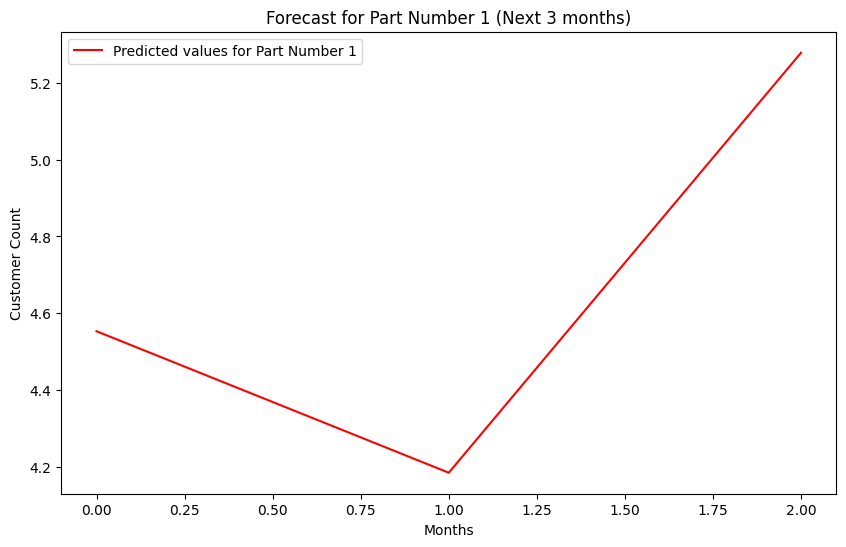

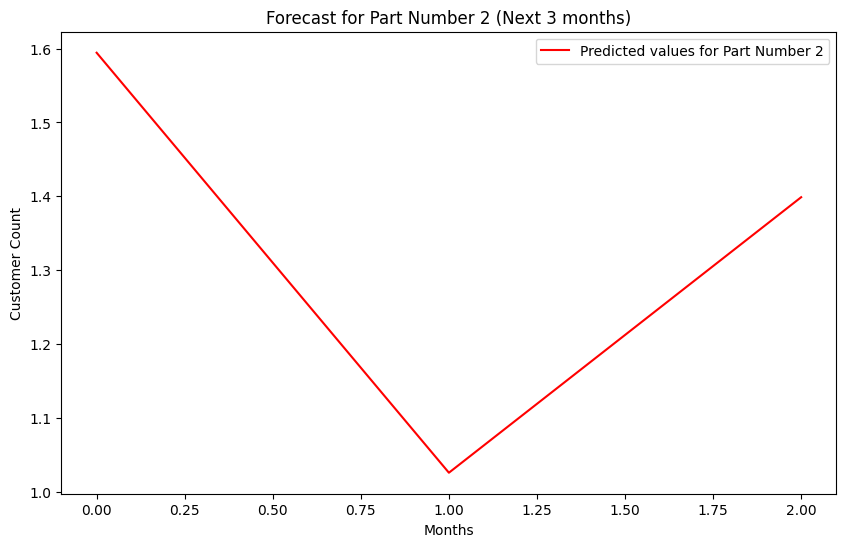

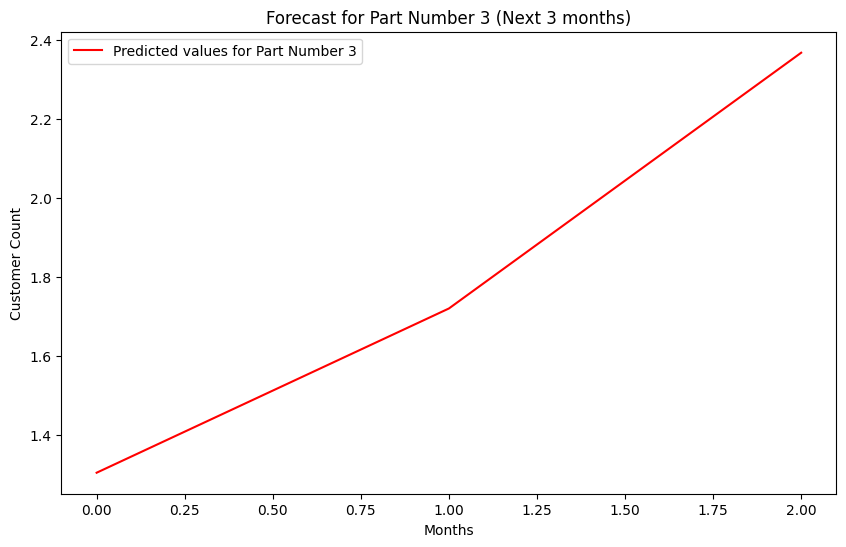

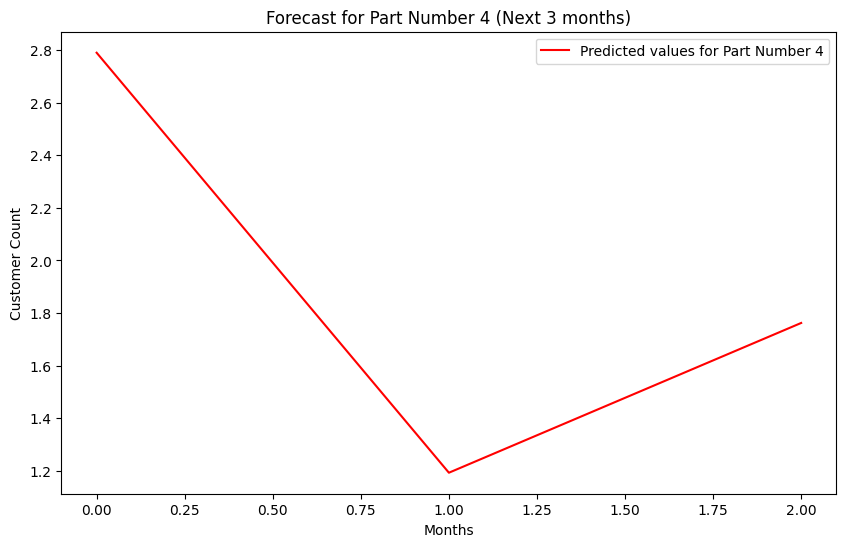

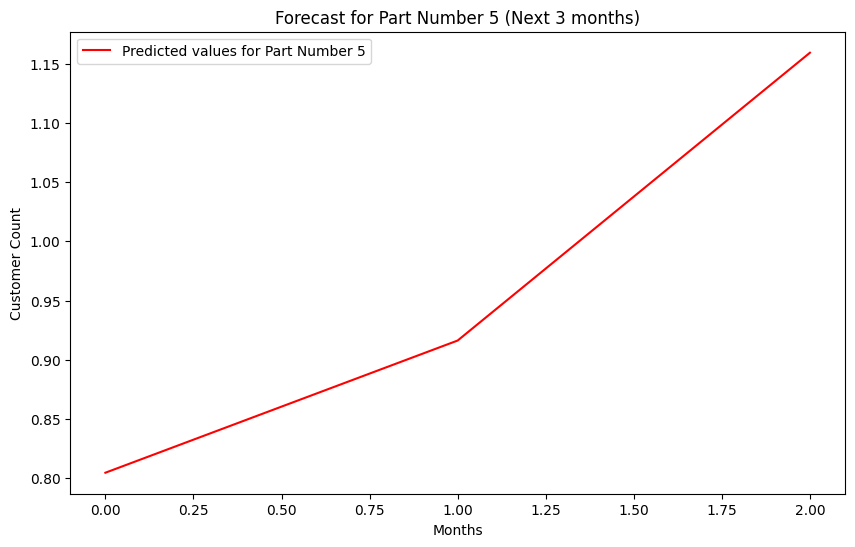

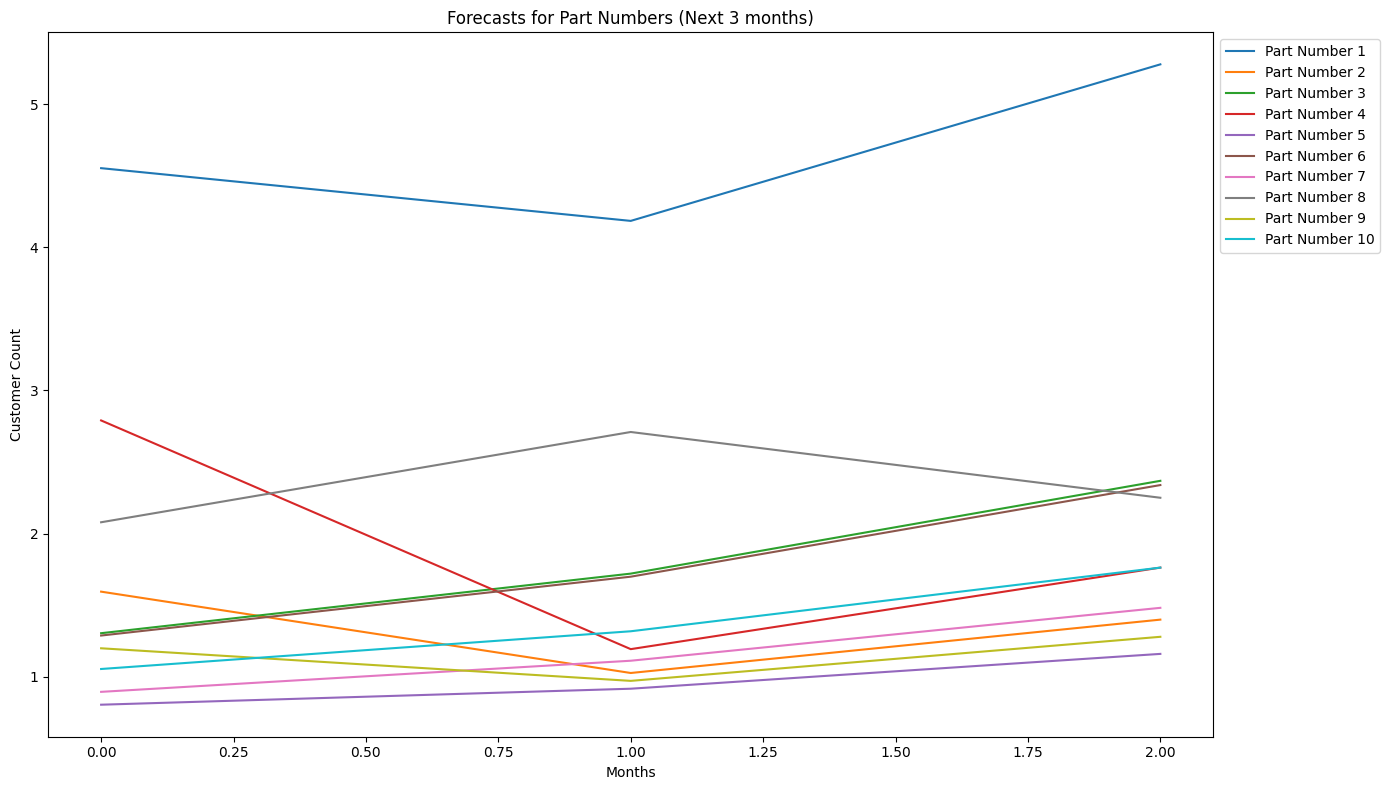

In [ ]:
# Normalize the input features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Fit scaler for target values (y)
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)  # Fit on target values (y)

# Reshape X for LSTM: [samples, time steps, features]
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Reshape y for LSTM (single value per sample)
y = y.reshape(-1, 1)

# Train/test split
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer for one prediction (next month demand)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict future demand on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values for all test set part numbers
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1))  # Inverse transform using fitted scaler
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform using fitted scaler

# Initialize a list to hold future predictions for all part numbers
future_predictions_all = []

# Forecast for each part number (loop over all part numbers in the test set)
for i in range(len(X_test)):
    # Extract the last 5 months data for the current part number
    part_number_data = X_test[i].reshape(1, 5, 1)

    future_predictions = []

    # Forecast the next 3 months for the current part number
    for _ in range(3):
        prediction = model.predict(part_number_data)
        future_predictions.append(prediction[0, 0])  # Append the predicted value

        # Update the data for the next prediction (slide the window)
        part_number_data = np.append(part_number_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Inverse transform the predictions back to the original scale
    future_predictions_reshaped = np.array(future_predictions).reshape(-1, 1)
    future_predictions_inverse = scaler_y.inverse_transform(future_predictions_reshaped)

    future_predictions_all.append(future_predictions_inverse.flatten())  # Flatten to store the predictions

# Convert the list of future predictions to a numpy array for easier handling
future_predictions_all = np.array(future_predictions_all)

# Print the forecasted demand for the next 3 months for each part number
print("Forecasted demand for the next 3 months (for each part number):")
for idx, predictions in enumerate(future_predictions_all):
    print(f'Part Number {idx + 1}: {predictions}')

# Optionally, plot the forecast for a few part numbers (e.g., for the first 5 part numbers)
for part_number_index in range(min(5, len(future_predictions_all))):  # Plot for the first 5 part numbers
    plt.figure(figsize=(10, 6))
    plt.plot(future_predictions_all[part_number_index], color='red', label=f'Predicted values for Part Number {part_number_index + 1}')
    plt.xlabel('Months')
    plt.ylabel('Customer Count')
    plt.title(f'Forecast for Part Number {part_number_index + 1} (Next 3 months)')
    plt.legend()
    plt.show()

# Optionally, plot all forecasts together (e.g., for part number 1, 2, 3,... up to 133)
# This might be too crowded, so ensure the plot size is large enough to handle many part numbers
plt.figure(figsize=(14, 8))
for part_number_index in range(min(10, len(future_predictions_all))):  # Plot for the first 10 part numbers
    plt.plot(future_predictions_all[part_number_index], label=f'Part Number {part_number_index + 1}')
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title('Forecasts for Part Numbers (Next 3 months)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend outside the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset (replace with the actual path to your CSV file)
data = pd.read_excel('/content/obs7-1 FILTER.xlsx')  # Replace with actual file path

# Example for columns H6, H5, H4, H3, H2, H1 for a single part number (row)
part_numbers = data[['H6', 'H5', 'H4', 'H3', 'H2', 'H1']].values  # All part numbers and months

# Prepare the input (X) and target (y) data
X = part_numbers[:, :-1]  # H6, H5, H4, H3, H2 (last 5 months)
y = part_numbers[:, -1]   # H1 (next month)

# Normalize the input features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape y to 2D for MinMaxScaler
y = y.reshape(-1, 1)  # Reshape target (y) to be 2D
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)  # Fit on target values (y)

# Reshape X for LSTM: [samples, time steps, features]
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train/test split
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer for one prediction (next month demand)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict future demand on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values for all test set part numbers
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1))  # Inverse transform using fitted scaler
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform using fitted scaler

# Initialize a list to hold future predictions for all part numbers
future_predictions_all = []

# Forecast for each part number (loop over all part numbers in the test set)
for i in range(len(X_test)):
    # Extract the last 5 months data for the current part number
    part_number_data = X_test[i].reshape(1, 5, 1)

    future_predictions = []

    # Forecast the next 3 months for the current part number
    for _ in range(3):
        prediction = model.predict(part_number_data)
        future_predictions.append(prediction[0, 0])  # Append the predicted value

        # Update the data for the next prediction (slide the window)
        part_number_data = np.append(part_number_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Inverse transform the predictions back to the original scale
    future_predictions_reshaped = np.array(future_predictions).reshape(-1, 1)
    future_predictions_inverse = scaler_y.inverse_transform(future_predictions_reshaped)

    future_predictions_all.append(future_predictions_inverse.flatten())  # Flatten to store the predictions

# Convert the list of future predictions to a pandas DataFrame for easier handling
future_predictions_all = np.array(future_predictions_all)

# Prepare the DataFrame for output (each part number's forecast for the next 3 months)
forecast_df = pd.DataFrame(future_predictions_all, columns=['Month 1', 'Month 2', 'Month 3'])

# Add part numbers as a new column (1, 2, ..., 133)
forecast_df['Part Number'] = data.index[:len(future_predictions_all)] + 1

# Reorder columns to have 'Part Number' at the front
forecast_df = forecast_df[['Part Number', 'Month 1', 'Month 2', 'Month 3']]

# Save the results to an Excel file
forecast_df.to_excel('forecasted_demand.xlsx', index=False)

print("Forecasted demand for the next 3 months saved to 'forecasted_demand.xlsx'")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0082 - val_loss: 0.0378
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - val_loss: 0.0315
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - val_loss: 0.0289
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - val_loss: 0.0262
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0233
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - val_loss: 0.0212
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - val_loss: 0.0213
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - val_loss: 0.0239
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0343
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0482
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0782
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.1211
Epoch 13/20
7/7 ━━━━━